In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [3]:
train_data = pd.read_csv('/Users/kithaa1/Desktop/pa1/dataset/train.csv')
test_data = pd.read_csv('/Users/kithaa1/Desktop/pa1/dataset/test.csv')

# Data Exploration and Preperation

In [4]:
train_data

,RaceEthnicityCategory,PneumoVaxEver,LastCheckupTime,SmokerStatus,HadAngina,HadDepressiveDisorder,DifficultyConcentrating,RemovedTeeth,BlindOrVisionDifficulty,GeneralHealth,...,DifficultyWalking,HadCOPD,MentalHealthDays,HadArthritis,DifficultyDressingBathing,HIVTesting,PhysicalActivities,DifficultyErrands,Age,HadHeartAttack
0,"White only, Non-Hispanic",No,1 year but less than 2 years ago (Within past ...,Never smoked,No,Yes,No,0,No,Very good,...,No,No,15.0,No,No,No,Yes,No,41.9,0
1,"White only, Non-Hispanic",No,Within past year (anytime less than 12 months ...,Current smoker - now smokes every day,No,Yes,No,"6 or more, but not all",No,Fair,...,No,No,0.0,No,No,Yes,Yes,Yes,42.3,0
2,"White only, Non-Hispanic",Yes,Within past year (anytime less than 12 months ...,Former smoker,No,No,No,0,No,Fair,...,Yes,No,0.0,Yes,No,No,No,Yes,66.3,0
3,"White only, Non-Hispanic",No,Within past year (anytime less than 12 months ...,Never smoked,No,No,No,0,No,Excellent,...,No,No,0.0,No,No,Yes,Yes,No,32.3,0
4,"White only, Non-Hispanic",No,Within past year (anytime less than 12 months ...,Former smoker,Yes,No,Yes,All,Yes,Fair,...,Yes,No,15.0,Yes,No,No,No,No,71.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196812,"White only, Non-Hispanic",Yes,Within past year (anytime less than 12 months ...,Current smoker - now smokes every day,No,No,No,1 to 5,No,Good,...,No,No,0.0,No,No,No,No,No,72.8,0
196813,"White only, Non-Hispanic",No,Within past year (anytime less than 12 months ...,Never smoked,No,No,No,0,No,Excellent,...,No,No,0.0,No,No,Yes,Yes,No,47.2,0
196814,"White only, Non-Hispanic",No,1 year but less than 2 years ago (Within past ...,Never smoked,No,No,No,1 to 5,No,Good,...,Yes,No,0.0,No,No,No,No,No,67.3,0
196815,"White only, Non-Hispanic",Yes,Within past year (anytime less than 12 months ...,Never smoked,No,No,No,1 to 5,No,Very good,...,No,No,1.0,Yes,No,No,Yes,No,72.5,0


##
[Q1] Dataset Overview

In [5]:
num_instances, num_features = train_data.shape

print(f'Total number of instances: {num_instances}')
print(f'Total number of features: {num_features}')

Total number of instances: 196817
Total number of features: 36


In [6]:
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_data.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'Numerical features: {numerical_features}')
print(f'Categorical features: {categorical_features}')

Numerical features: ['BMI', 'PhysicalHealthDays', 'SleepHours', 'MentalHealthDays', 'Age', 'HadHeartAttack']
Categorical features: ['RaceEthnicityCategory', 'PneumoVaxEver', 'LastCheckupTime', 'SmokerStatus', 'HadAngina', 'HadDepressiveDisorder', 'DifficultyConcentrating', 'RemovedTeeth', 'BlindOrVisionDifficulty', 'GeneralHealth', 'HadSkinCancer', 'HighRiskLastYear', 'ECigaretteUsage', 'ChestScan', 'HadStroke', 'FluVaxLast12', 'Sex', 'HadDiabetes', 'HadKidneyDisease', 'AlcoholDrinkers', 'DeafOrHardOfHearing', 'CovidPos', 'HadAsthma', 'DifficultyWalking', 'HadCOPD', 'HadArthritis', 'DifficultyDressingBathing', 'HIVTesting', 'PhysicalActivities', 'DifficultyErrands']


Double checking each value for features mistakenly being classfied as numerical

In [7]:
for feature in numerical_features:
  print(f'{feature}: {train_data[feature].nunique()}')

BMI: 3333
PhysicalHealthDays: 31
SleepHours: 23
MentalHealthDays: 31
Age: 492
HadHeartAttack: 2


It seems that HadheartAttack has been wrongly classified

In [8]:
numerical_features.remove("HadHeartAttack")
categorical_features.append("HadHeartAttack")

In [9]:
print(f'Numerical features: {numerical_features}')
print(f'Categorical features: {categorical_features}')

Numerical features: ['BMI', 'PhysicalHealthDays', 'SleepHours', 'MentalHealthDays', 'Age']
Categorical features: ['RaceEthnicityCategory', 'PneumoVaxEver', 'LastCheckupTime', 'SmokerStatus', 'HadAngina', 'HadDepressiveDisorder', 'DifficultyConcentrating', 'RemovedTeeth', 'BlindOrVisionDifficulty', 'GeneralHealth', 'HadSkinCancer', 'HighRiskLastYear', 'ECigaretteUsage', 'ChestScan', 'HadStroke', 'FluVaxLast12', 'Sex', 'HadDiabetes', 'HadKidneyDisease', 'AlcoholDrinkers', 'DeafOrHardOfHearing', 'CovidPos', 'HadAsthma', 'DifficultyWalking', 'HadCOPD', 'HadArthritis', 'DifficultyDressingBathing', 'HIVTesting', 'PhysicalActivities', 'DifficultyErrands', 'HadHeartAttack']


##
[Q2] Missing Values

In [10]:
missing_values = train_data.isnull().sum()
missing_features = missing_values[missing_values > 0]

print('Features with missing values:')
print(missing_features)

Features with missing values:
BMI    8258
dtype: int64


In [11]:
print(f'Proportion of Missing Values: {missing_features/num_instances * 100}')

Proportion of Missing Values: BMI    4.195776
dtype: float64


Potential Impact: Having many missing values for "BMI" can hinder model performance due to loss of information, challenges in imputation, increased model complexity, and skewed evaluation metrics. Careful handling of these missing values is crucial for building a robust predictive model.



##
[Q3] Feature Distribution

Determine the discrete and continous data

In [12]:
discrete_features = ['PhysicalHealthDays', 'MentalHealthDays']
continuous_features = ['BMI', 'Age', 'SleepHours']

print(f'Discrete Features: {discrete_features}')
print(f'Continuous Features: {continuous_features}')

Discrete Features: ['PhysicalHealthDays', 'MentalHealthDays']
Continuous Features: ['BMI', 'Age', 'SleepHours']


Describe the distribution

Descriptive statistics for BMI
count     188559.000000
mean          28.677420
std            6.514538
min           12.020000
25%           24.280000
50%           27.460000
75%           31.890000
max           97.650000
range         85.630000
median        27.460000
Name: BMI, dtype: float64


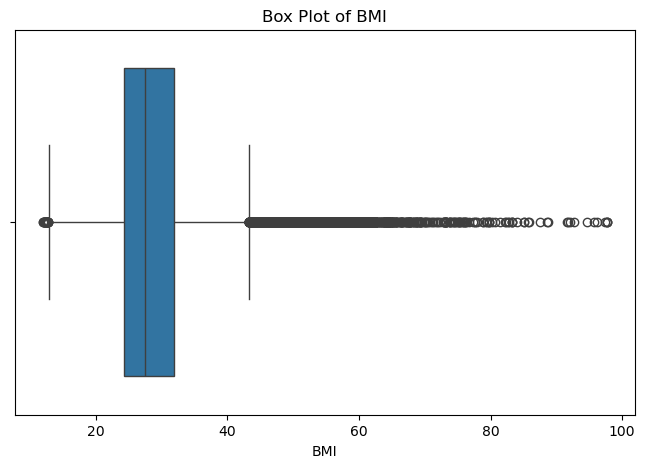

Descriptive statistics for PhysicalHealthDays
count     196817.000000
mean           4.118486
std            8.405127
min            0.000000
25%            0.000000
50%            0.000000
75%            3.000000
max           30.000000
range         30.000000
median         0.000000
Name: PhysicalHealthDays, dtype: float64


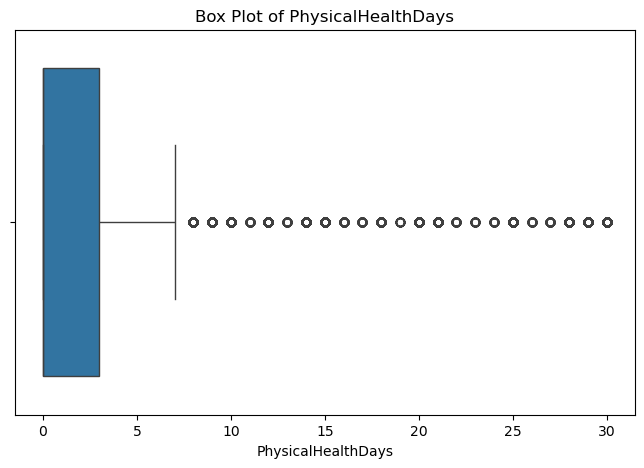

Descriptive statistics for SleepHours
count     196817.000000
mean           7.020466
std            1.441551
min            1.000000
25%            6.000000
50%            7.000000
75%            8.000000
max           24.000000
range         23.000000
median         7.000000
Name: SleepHours, dtype: float64


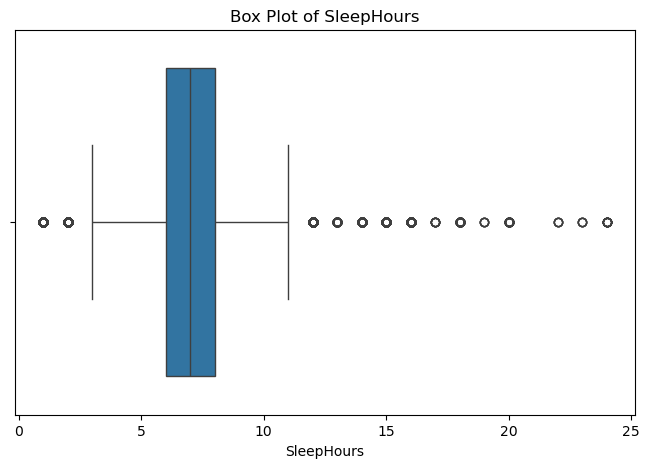

Descriptive statistics for MentalHealthDays
count     196817.000000
mean           4.177403
std            8.112694
min            0.000000
25%            0.000000
50%            0.000000
75%            4.000000
max           30.000000
range         30.000000
median         0.000000
Name: MentalHealthDays, dtype: float64


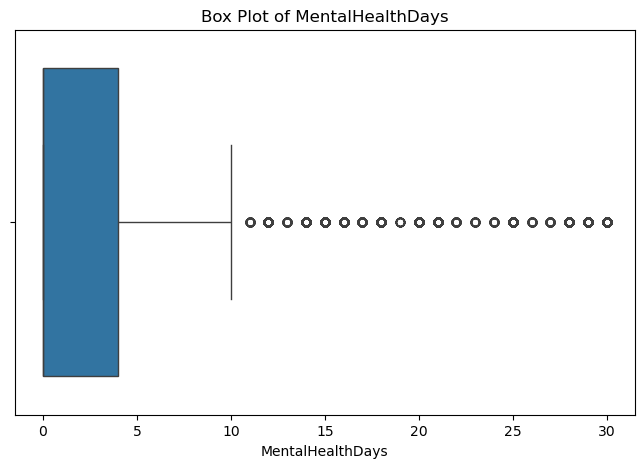

Descriptive statistics for Age
count     196817.000000
mean          55.750171
std           17.551129
min           18.600000
25%           42.300000
50%           57.500000
75%           70.900000
max           84.000000
range         65.400000
median        57.500000
Name: Age, dtype: float64


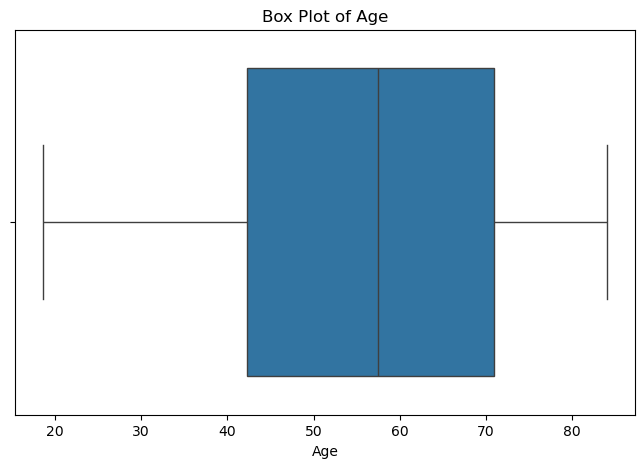

In [13]:
description_df = pd.DataFrame()

for feature in numerical_features:
  #Descriptive Statistics
  description = train_data[feature].describe()
  description["range"] = description.loc['max'] - description.loc['min']
  description.loc['median'] = train_data[feature].median()
  print(f'Descriptive statistics for {feature}')
  description_df = pd.concat([description_df, pd.DataFrame(description).T])
  print(description)

  #Box Plot
  plt.figure(figsize=(8, 5))
  sns.boxplot(x=train_data[feature])
  plt.title(f'Box Plot of {feature}')
  plt.xlabel(feature)
  plt.show()

In [14]:
description_df

,count,mean,std,min,25%,50%,75%,max,range,median
BMI,188559.0,28.677420,6.514538,12.02,24.28,27.46,31.89,97.65,85.63,27.46
PhysicalHealthDays,196817.0,4.118486,8.405127,0.00,0.00,0.00,3.00,30.00,30.00,0.00
SleepHours,196817.0,7.020466,1.441551,1.00,6.00,7.00,8.00,24.00,23.00,7.00
MentalHealthDays,196817.0,4.177403,8.112694,0.00,0.00,0.00,4.00,30.00,30.00,0.00
Age,196817.0,55.750171,17.551129,18.60,42.30,57.50,70.90,84.00,65.40,57.50


Determining if Categorical Features are binary, nomial, or ordinal

In [15]:
def is_binary(column):
  unique_values = column.unique()
  unique_values_count = len(unique_values)
  if unique_values_count == 2:
    return True

In [16]:
binary_features = []

for feature in categorical_features:
  if is_binary(train_data[feature]):
    binary_features.append(feature)

#Change all binary data to 1 and 0
binary_df = train_data.copy()
binary_df[binary_features] = binary_df[binary_features].replace({'Yes': 1, 'No': 0})
binary_df[binary_features] = binary_df[binary_features].replace({'Male': 1, 'Female': 0}) # Standardize Male as 1 and Female as 0

/var/folders/ws/lv24jr9s1cq05818pkc9rtgc0000gq/T/ipykernel_65031/2362719177.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_df[binary_features] = binary_df[binary_features].replace({'Yes': 1, 'No': 0})
/var/folders/ws/lv24jr9s1cq05818pkc9rtgc0000gq/T/ipykernel_65031/2362719177.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_df[binary_features] = binary_df[binary_features].replace({'Male': 1, 'Female': 0}) # Standardize Male as 1 and Female as 0


In [17]:
for feature in binary_features:
  print(feature)
  print(binary_df[feature].unique())

PneumoVaxEver
[0 1]
HadAngina
[0 1]
HadDepressiveDisorder
[1 0]
DifficultyConcentrating
[0 1]
BlindOrVisionDifficulty
[0 1]
HadSkinCancer
[0 1]
HighRiskLastYear
[0 1]
ChestScan
[0 1]
HadStroke
[0 1]
FluVaxLast12
[0 1]
Sex
[1 0]
HadKidneyDisease
[0 1]
AlcoholDrinkers
[1 0]
DeafOrHardOfHearing
[0 1]
HadAsthma
[0 1]
DifficultyWalking
[0 1]
HadCOPD
[0 1]
HadArthritis
[0 1]
DifficultyDressingBathing
[0 1]
HIVTesting
[0 1]
PhysicalActivities
[1 0]
DifficultyErrands
[0 1]
HadHeartAttack
[0 1]


In [18]:
remaining_features = set(categorical_features) - set(binary_features)
remaining_features

{'CovidPos',
 'ECigaretteUsage',
 'GeneralHealth',
 'HadDiabetes',
 'LastCheckupTime',
 'RaceEthnicityCategory',
 'RemovedTeeth',
 'SmokerStatus'}

Now, lets look into each of these features to categorise them better

In [19]:
for feature in remaining_features:
  print(feature)
  print(binary_df[feature].unique())
  print(binary_df[feature].nunique())

RemovedTeeth
['0' '6 or more, but not all' 'All' '1 to 5']
4
SmokerStatus
['Never smoked' 'Current smoker - now smokes every day' 'Former smoker'
 'Current smoker - now smokes some days']
4
GeneralHealth
['Very good' 'Fair' 'Excellent' 'Good' 'Poor']
5
HadDiabetes
['No' 'Yes' 'Yes, but only during pregnancy (female)'
 'No, pre-diabetes or borderline diabetes']
4
CovidPos
['No' 'Yes'
 'Tested positive using home test without a health professional']
3
LastCheckupTime
['1 year but less than 2 years ago (Within past 2 years)'
 'Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 '2 year but less than 5 years ago (Within past 5 years)']
4
RaceEthnicityCategory
['White only, Non-Hispanic' 'Black only, Non-Hispanic' 'Hispanic'
 'Multiracial, Non-Hispanic' 'Other race only, Non-Hispanic']
5
ECigaretteUsage
['Never used e-cigarettes in my entire life' 'Not at all (right now)'
 'Use them a few days' 'Use them every day']
4


From the above, it is clear that ECigaretteUsage, LastCheckupTime, RemovedTeeth, GeneralHealth, and SmokerStatus, HadDiabetes are ordial; The rest are nominal.

In [20]:
ordial_features = ['ECigaretteUsage', 'LastCheckupTime', 'RemovedTeeth', 'GeneralHealth', 'SmokerStatus', 'HadDiabetes']
nominal_features = set(remaining_features) - set(ordial_features)
nominal_features = list(nominal_features)

In [21]:
nominal_features

['CovidPos', 'RaceEthnicityCategory']

In [22]:
binary_features

['PneumoVaxEver',
 'HadAngina',
 'HadDepressiveDisorder',
 'DifficultyConcentrating',
 'BlindOrVisionDifficulty',
 'HadSkinCancer',
 'HighRiskLastYear',
 'ChestScan',
 'HadStroke',
 'FluVaxLast12',
 'Sex',
 'HadKidneyDisease',
 'AlcoholDrinkers',
 'DeafOrHardOfHearing',
 'HadAsthma',
 'DifficultyWalking',
 'HadCOPD',
 'HadArthritis',
 'DifficultyDressingBathing',
 'HIVTesting',
 'PhysicalActivities',
 'DifficultyErrands',
 'HadHeartAttack']

Describe two of the Categorical Features. The two selected features are Sex and AlcoholDrinkers.

Sex: Sex
Female    102192
Male       94625
Name: count, dtype: int64
AlcoholDrinkers: AlcoholDrinkers
Yes    108243
No      88574
Name: count, dtype: int64


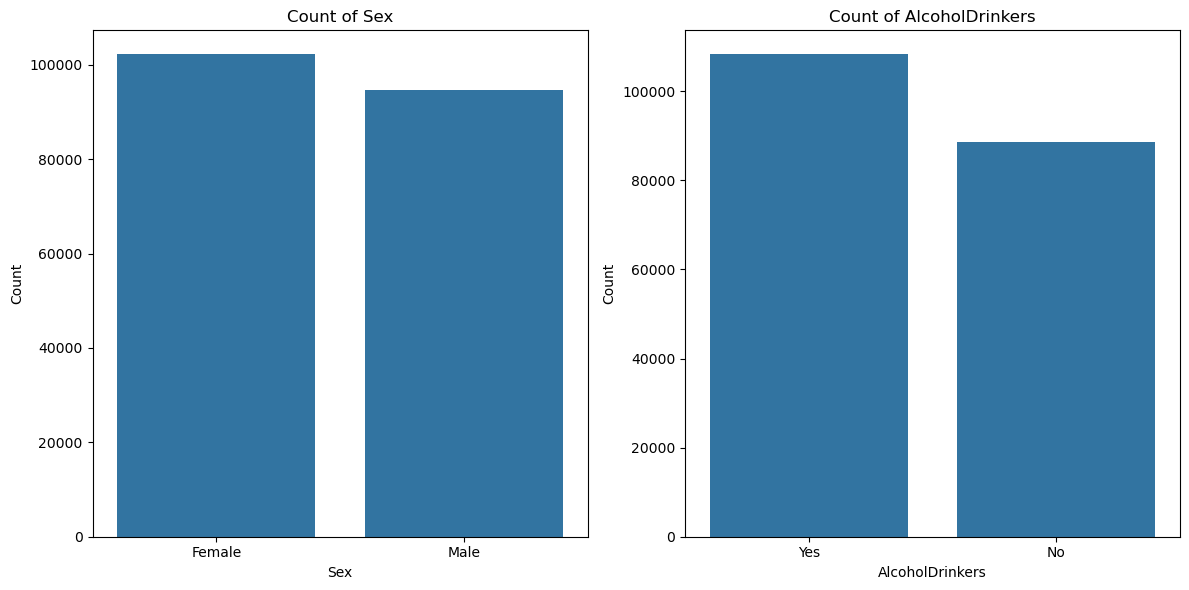

In [23]:
# Create a bar plot
feature1_counts = train_data['Sex'].value_counts()
feature2_counts = train_data['AlcoholDrinkers'].value_counts()

print(f'Sex: {feature1_counts}')
print(f'AlcoholDrinkers: {feature2_counts}')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for Feature1
sns.barplot(x=feature1_counts.index, y=feature1_counts.values, ax=axes[0])
axes[0].set_title('Count of Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')

# Bar plot for Feature2
sns.barplot(x=feature2_counts.index, y=feature2_counts.values, ax=axes[1])
axes[1].set_title('Count of AlcoholDrinkers')
axes[1].set_xlabel('AlcoholDrinkers')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## [Q4] Correlation Analysis

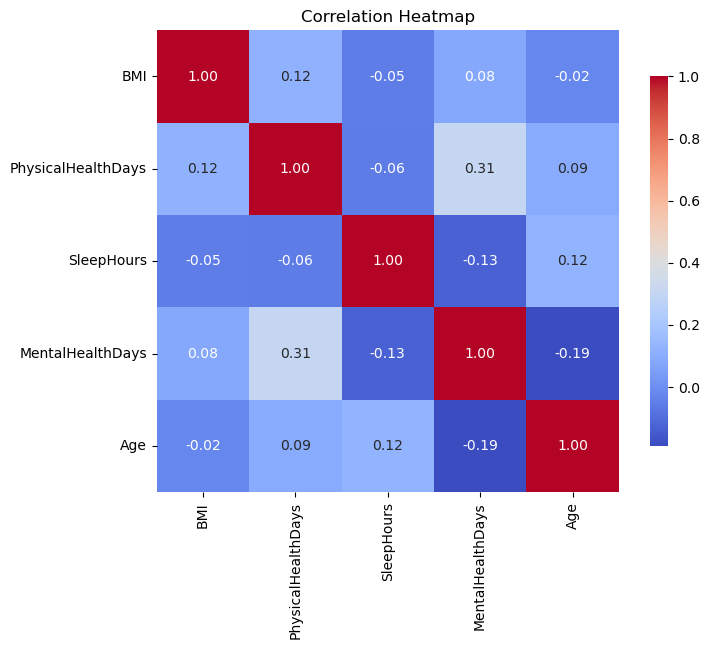

In [24]:
numerical_data = binary_df[numerical_features]
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

The strongest correlation is MentalHealthDays and PhysicalHealthDays.

# Data Preprocessing Techniques

## [Q5] Handling Missing Values


In [25]:
def impute_df(df, strategy, feature):
  imputer = SimpleImputer(strategy=strategy)
  imputed_feature = imputer.fit_transform(df[[feature]])

  imputed_df = df.copy()
  imputed_df[feature] = imputed_feature
  return imputed_df

In [26]:
imputed_df = impute_df(binary_df, strategy = 'median', feature = 'BMI')

missing_values = imputed_df.isnull().sum()
missing_features = missing_values[missing_values > 0]

print('Features with missing values:')
print(missing_features)

Features with missing values:
Series([], dtype: int64)


There are several strategies that can be used to handle the missing values. The strategies depend on the type of data we are dealing with.
- Mean can used when the data is normally distributed, and does not contain outliers. This is because the mean is sensitive to outliers, which could skew the results
- Median is used when there are outliers (such as our dataset for BMI according to Q3) as the median can robust to outliers and provides central tendancies
- Mode can used for categorical data or when there is frequent occuerences to help preserve the common data.
- Constant can be used to indicate special circumstances (such as using 0 for NA), and also when you want to maintain the same data

These are common reaasons, but at the end of the day, it really depends on the distribution, presence of outliers, nature of the data, and relationship between features

## [Q6] Normalization and Standarization

First 10 samples before processing

*Reference 2.1*

In [142]:
imputed_df['BMI'].head(10)

0    25.10
1    22.60
2    33.45
3    23.11
4    32.89
5    20.18
6    32.49
7    24.33
8    35.44
9    21.77
Name: BMI, dtype: float64

Checking if any of the variables are normally distributed to decide how to normalise the features

*Reference 2.2*

In [28]:
from scipy.stats import shapiro
normally_distributed = []

for feature in numerical_features:
  stat, p_value = shapiro(imputed_df[feature])
  print('Shapiro-Wilk Test Statistic:', stat)
  print('p-value:', p_value)

  if p_value > 0.05:
      normally_distributed.append((feature, True))
  else:
      normally_distributed.append((feature, False))

normally_distributed


Shapiro-Wilk Test Statistic: 0.9233228352634206
p-value: 6.053130381162741e-119
Shapiro-Wilk Test Statistic: 0.5441036103542574
p-value: 3.815809667888534e-175
Shapiro-Wilk Test Statistic: 0.8948201574465516
p-value: 4.154979309816149e-128
Shapiro-Wilk Test Statistic: 0.5752464925381643
p-value: 1.0509947302943556e-172
Shapiro-Wilk Test Statistic: 0.9554270253326635
p-value: 5.0685270314298055e-104


/var/folders/ws/lv24jr9s1cq05818pkc9rtgc0000gq/T/ipykernel_65031/2371730630.py:5: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 196817.
  stat, p_value = shapiro(imputed_df[feature])


[('BMI', False),
 ('PhysicalHealthDays', False),
 ('SleepHours', False),
 ('MentalHealthDays', False),
 ('Age', False)]

In [29]:
numerical_features

['BMI', 'PhysicalHealthDays', 'SleepHours', 'MentalHealthDays', 'Age']

*Reference 2.3*

In [145]:
from sklearn.preprocessing import RobustScaler

numerical_features_without_age = list(numerical_features)
numerical_features_without_age.remove('Age')

normalized_df = pd.DataFrame()

normalized_df = pd.DataFrame()
robust_scaler = RobustScaler()
scaled_data = robust_scaler.fit_transform(imputed_df[numerical_features_without_age])

normalized_df[numerical_features_without_age] = scaled_data
normalized_df['Age'] = imputed_df[['Age']]
normalized_df['BMI'].head(10)

0   -0.326418
1   -0.672199
2    0.828492
3   -0.601660
4    0.751037
5   -1.006916
6    0.695712
7   -0.432918
8    1.103734
9   -0.786999
Name: BMI, dtype: float64

- StandardScale: used when normally distributed data, algo is sensitive to mean/variance. Scales features to mean 0,unit variance
- MinMaxScalar: used when known bounds, scales features to range of [0,1]
- RobustScalar: used with data with outliers, non-normally distributed data, centers data around the median

## [Q7] Encoding Categorical Variables

*Reference 2.4* Dataframe before any encoding

In [147]:
imputed_df

,RaceEthnicityCategory,PneumoVaxEver,LastCheckupTime,SmokerStatus,HadAngina,HadDepressiveDisorder,DifficultyConcentrating,RemovedTeeth,BlindOrVisionDifficulty,GeneralHealth,...,DifficultyWalking,HadCOPD,MentalHealthDays,HadArthritis,DifficultyDressingBathing,HIVTesting,PhysicalActivities,DifficultyErrands,Age,HadHeartAttack
0,"White only, Non-Hispanic",0,1 year but less than 2 years ago (Within past ...,Never smoked,0,1,0,0,0,Very good,...,0,0,15.0,0,0,0,1,0,41.9,0
1,"White only, Non-Hispanic",0,Within past year (anytime less than 12 months ...,Current smoker - now smokes every day,0,1,0,"6 or more, but not all",0,Fair,...,0,0,0.0,0,0,1,1,1,42.3,0
2,"White only, Non-Hispanic",1,Within past year (anytime less than 12 months ...,Former smoker,0,0,0,0,0,Fair,...,1,0,0.0,1,0,0,0,1,66.3,0
3,"White only, Non-Hispanic",0,Within past year (anytime less than 12 months ...,Never smoked,0,0,0,0,0,Excellent,...,0,0,0.0,0,0,1,1,0,32.3,0
4,"White only, Non-Hispanic",0,Within past year (anytime less than 12 months ...,Former smoker,1,0,1,All,1,Fair,...,1,0,15.0,1,0,0,0,0,71.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196812,"White only, Non-Hispanic",1,Within past year (anytime less than 12 months ...,Current smoker - now smokes every day,0,0,0,1 to 5,0,Good,...,0,0,0.0,0,0,0,0,0,72.8,0
196813,"White only, Non-Hispanic",0,Within past year (anytime less than 12 months ...,Never smoked,0,0,0,0,0,Excellent,...,0,0,0.0,0,0,1,1,0,47.2,0
196814,"White only, Non-Hispanic",0,1 year but less than 2 years ago (Within past ...,Never smoked,0,0,0,1 to 5,0,Good,...,1,0,0.0,0,0,0,0,0,67.3,0
196815,"White only, Non-Hispanic",1,Within past year (anytime less than 12 months ...,Never smoked,0,0,0,1 to 5,0,Very good,...,0,0,1.0,1,0,0,1,0,72.5,0


Dealing with OrdinalEncoder data by understanding the datatype

In [31]:
for feature in ordial_features:
  print(feature)
  print(imputed_df[feature].unique())

ECigaretteUsage
['Never used e-cigarettes in my entire life' 'Not at all (right now)'
 'Use them a few days' 'Use them every day']
LastCheckupTime
['1 year but less than 2 years ago (Within past 2 years)'
 'Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 '2 year but less than 5 years ago (Within past 5 years)']
RemovedTeeth
['0' '6 or more, but not all' 'All' '1 to 5']
GeneralHealth
['Very good' 'Fair' 'Excellent' 'Good' 'Poor']
SmokerStatus
['Never smoked' 'Current smoker - now smokes every day' 'Former smoker'
 'Current smoker - now smokes some days']
HadDiabetes
['No' 'Yes' 'Yes, but only during pregnancy (female)'
 'No, pre-diabetes or borderline diabetes']


Top 10 ordial data before processing

*Reference 2.5*

In [32]:
imputed_df[ordial_features].head(10)

,ECigaretteUsage,LastCheckupTime,RemovedTeeth,GeneralHealth,SmokerStatus,HadDiabetes
0,Never used e-cigarettes in my entire life,1 year but less than 2 years ago (Within past ...,0,Very good,Never smoked,No
1,Not at all (right now),Within past year (anytime less than 12 months ...,"6 or more, but not all",Fair,Current smoker - now smokes every day,No
2,Never used e-cigarettes in my entire life,Within past year (anytime less than 12 months ...,0,Fair,Former smoker,Yes
3,Never used e-cigarettes in my entire life,Within past year (anytime less than 12 months ...,0,Excellent,Never smoked,No
4,Not at all (right now),Within past year (anytime less than 12 months ...,All,Fair,Former smoker,No
5,Not at all (right now),Within past year (anytime less than 12 months ...,1 to 5,Very good,Current smoker - now smokes every day,No
6,Not at all (right now),Within past year (anytime less than 12 months ...,0,Excellent,Former smoker,No
7,Never used e-cigarettes in my entire life,5 or more years ago,All,Good,Current smoker - now smokes every day,No
8,Never used e-cigarettes in my entire life,Within past year (anytime less than 12 months ...,1 to 5,Fair,Current smoker - now smokes every day,No
9,Not at all (right now),Within past year (anytime less than 12 months ...,0,Very good,Never smoked,No


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Never used e-cigarettes in my entire life', 'Not at all (right now)', 'Use them a few days', 'Use them every day']])
ordinal_encoded = ordinal_encoder.fit_transform(imputed_df[['ECigaretteUsage']])
normalized_df['ECigaretteUsage'] = ordinal_encoded

ordinal_encoder = OrdinalEncoder(categories=[['Within past year (anytime less than 12 months ago)', '1 year but less than 2 years ago (Within past 2 years)', '2 year but less than 5 years ago (Within past 5 years)', '5 or more years ago']])
ordinal_encoded = ordinal_encoder.fit_transform(imputed_df[['LastCheckupTime']])
normalized_df['LastCheckupTime'] = ordinal_encoded

ordinal_encoder = OrdinalEncoder(categories=[['0', '1 to 5', '6 or more, but not all', 'All']])
ordinal_encoded = ordinal_encoder.fit_transform(imputed_df[['RemovedTeeth']])
normalized_df['RemovedTeeth'] = ordinal_encoded

ordinal_encoder = OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very good', "Excellent"]])
ordinal_encoded = ordinal_encoder.fit_transform(imputed_df[['GeneralHealth']])
normalized_df['GeneralHealth'] = ordinal_encoded

ordinal_encoder = OrdinalEncoder(categories=[['Never smoked', 'Former smoker','Current smoker - now smokes some days' ,'Current smoker - now smokes every day']])
ordinal_encoded = ordinal_encoder.fit_transform(imputed_df[['SmokerStatus']])
normalized_df['SmokerStatus'] = ordinal_encoded

ordinal_encoder = OrdinalEncoder(categories=[['No', 'No, pre-diabetes or borderline diabetes','Yes, but only during pregnancy (female)', 'Yes']])
ordinal_encoded = ordinal_encoder.fit_transform(imputed_df[['HadDiabetes']])
normalized_df['HadDiabetes'] = ordinal_encoded

*Reference 2.6*

In [39]:
normalized_df[ordial_features].head(10)

,ECigaretteUsage,LastCheckupTime,RemovedTeeth,GeneralHealth,SmokerStatus,HadDiabetes
0,0.0,1.0,0.0,3.0,0.0,0.0
1,1.0,0.0,2.0,1.0,3.0,0.0
2,0.0,0.0,0.0,1.0,1.0,3.0
3,0.0,0.0,0.0,4.0,0.0,0.0
4,1.0,0.0,3.0,1.0,1.0,0.0
5,1.0,0.0,1.0,3.0,3.0,0.0
6,1.0,0.0,0.0,4.0,1.0,0.0
7,0.0,3.0,3.0,2.0,3.0,0.0
8,0.0,0.0,1.0,1.0,3.0,0.0
9,1.0,0.0,0.0,3.0,0.0,0.0


Move on to OneHotEncoder

*Reference 2.7*

In [40]:
imputed_df[nominal_features].head(10)

,CovidPos,RaceEthnicityCategory
0,No,"White only, Non-Hispanic"
1,Yes,"White only, Non-Hispanic"
2,No,"White only, Non-Hispanic"
3,No,"White only, Non-Hispanic"
4,No,"White only, Non-Hispanic"
5,No,"Black only, Non-Hispanic"
6,Yes,Hispanic
7,No,"Multiracial, Non-Hispanic"
8,Yes,"White only, Non-Hispanic"
9,No,"White only, Non-Hispanic"


In [41]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output = False)  # sparse=False returns a dense array

one_hot_encoded = one_hot_encoder.fit_transform(imputed_df[nominal_features])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(nominal_features))
one_hot_encoded_df.head(10)

,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic"
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


*Reference 2.8*

In [42]:
df_final = pd.concat([normalized_df, one_hot_encoded_df,imputed_df[binary_features]], axis=1)
df_final

,BMI,PhysicalHealthDays,SleepHours,MentalHealthDays,Age,ECigaretteUsage,LastCheckupTime,RemovedTeeth,GeneralHealth,SmokerStatus,...,DeafOrHardOfHearing,HadAsthma,DifficultyWalking,HadCOPD,HadArthritis,DifficultyDressingBathing,HIVTesting,PhysicalActivities,DifficultyErrands,HadHeartAttack
0,-0.326418,0.000000,0.5,3.75,41.9,0.0,1.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,-0.672199,0.000000,1.5,0.00,42.3,1.0,0.0,2.0,1.0,3.0,...,0,1,0,0,0,0,1,1,1,0
2,0.828492,0.333333,-0.5,0.00,66.3,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,1,0,0,0,1,0
3,-0.601660,0.000000,0.5,0.00,32.3,0.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,0,1,1,0,0
4,0.751037,5.000000,-1.5,3.75,71.4,1.0,0.0,3.0,1.0,1.0,...,0,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196812,1.796680,0.000000,0.5,0.00,72.8,0.0,0.0,1.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
196813,0.000000,0.000000,0.5,0.00,47.2,0.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,0,1,1,0,0
196814,1.313970,0.000000,0.0,0.00,67.3,0.0,1.0,1.0,2.0,0.0,...,1,0,1,0,0,0,0,0,0,0
196815,-0.491010,0.000000,0.5,0.25,72.5,0.0,0.0,1.0,3.0,0.0,...,0,0,0,0,1,0,0,1,0,0


In [43]:
df_final.shape

(196817, 42)

As a rule of thumb:

- Use OneHotEncoder for nominal categorical variables with no inherent order.
- Use OrdinalEncoder for ordinal categorical variables where the order matters.

## [Q8] Feature Selection

Regression K best features

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

y = df_final['Age']
X = df_final.drop(columns=['Age'])

selector = SelectKBest(score_func=f_regression)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

feature_scores = selector.scores_

feature_importance_reg = pd.DataFrame({
    'Feature': X.columns,
    'Score': feature_scores
})

feature_importance_reg = feature_importance_reg.sort_values(by='Score', ascending=False)


feature_importance_reg

,Feature,Score
18,PneumoVaxEver,42097.177978
35,HadArthritis,32647.269055
6,RemovedTeeth,27337.238304
27,FluVaxLast12,16471.110643
4,ECigaretteUsage,16180.675940
25,ChestScan,14572.047883
23,HadSkinCancer,12341.046947
5,LastCheckupTime,11445.232427
33,DifficultyWalking,11045.371966
37,HIVTesting,9860.228281


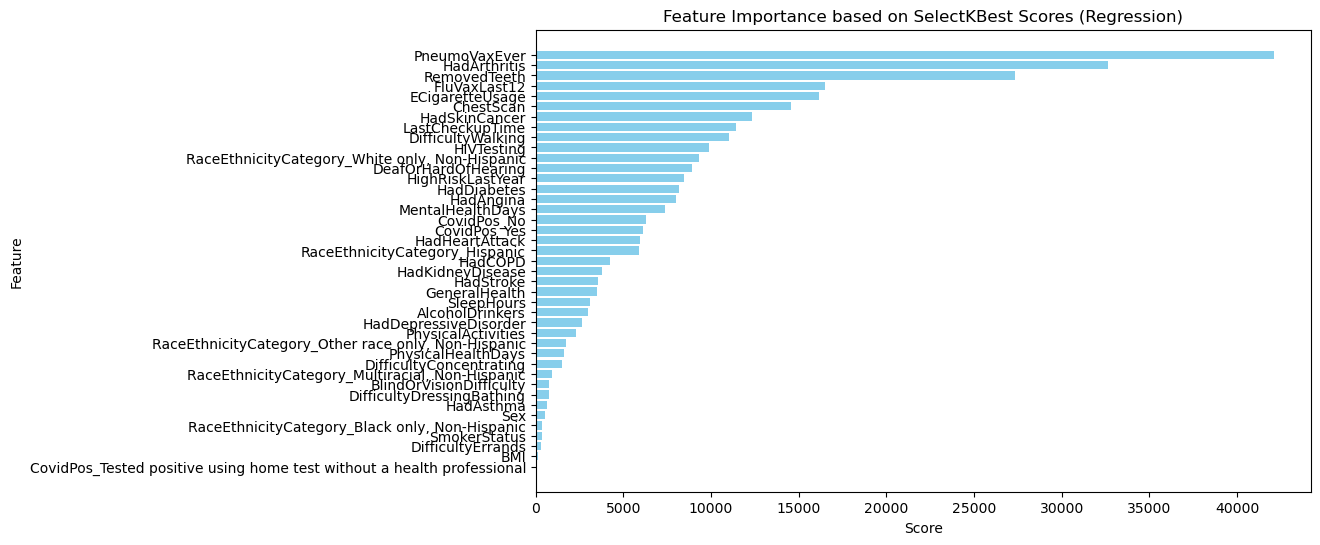

In [45]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_reg['Feature'], feature_importance_reg['Score'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance based on SelectKBest Scores (Regression)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

After selecting K best, it is clear that there is a large drop after RemovedTeeth as seen by the graph above. However, to insure there is no loss of information and allow for model generalization, we have decided to keep the top 25% scores.

In [46]:
threshold = feature_importance_reg['Score'].quantile(0.75)

k_best_regression_top25 = feature_importance_reg[feature_importance_reg['Score'] >= threshold]
k_best_regression_top25

,Feature,Score
18,PneumoVaxEver,42097.177978
35,HadArthritis,32647.269055
6,RemovedTeeth,27337.238304
27,FluVaxLast12,16471.110643
4,ECigaretteUsage,16180.675940
25,ChestScan,14572.047883
23,HadSkinCancer,12341.046947
5,LastCheckupTime,11445.232427
33,DifficultyWalking,11045.371966
37,HIVTesting,9860.228281


Selecting K-best for classification

In [47]:
from sklearn.feature_selection import SelectKBest, f_classif

y_classif = df_final['HadHeartAttack']
X_classif = df_final.drop(columns=['HadHeartAttack'])

selector = SelectKBest(score_func=f_classif)
X_selected = selector.fit_transform(X_classif, y_classif)
selected_features = X_classif.columns[selector.get_support()]

feature_scores = selector.scores_

feature_importance_classif = pd.DataFrame({
    'Feature': X_classif.columns,
    'Score': feature_scores
})

feature_importance_classif = feature_importance_classif.sort_values(by='Score', ascending=False)


feature_importance_classif

,Feature,Score
20,HadAngina,48469.546545
8,GeneralHealth,7023.132189
27,HadStroke,6455.728259
4,Age,5953.506967
26,ChestScan,5654.179516
7,RemovedTeeth,5566.624943
34,DifficultyWalking,5191.396344
10,HadDiabetes,4125.214181
1,PhysicalHealthDays,3618.084493
35,HadCOPD,3562.136024


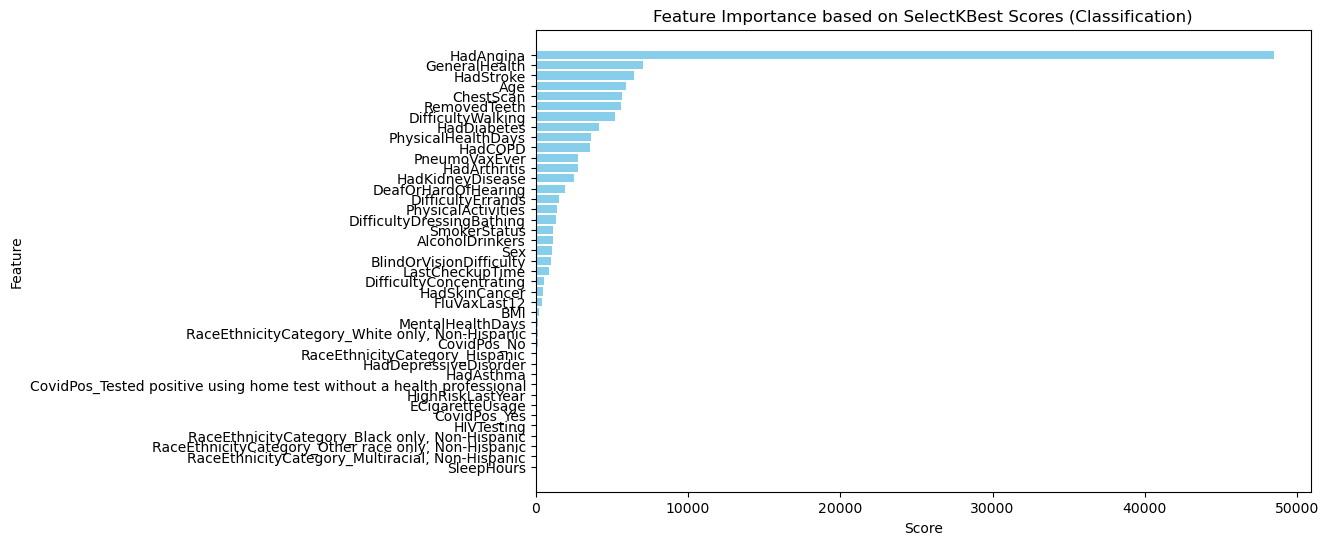

In [71]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_classif['Feature'], feature_importance_classif['Score'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance based on SelectKBest Scores (Classification)')
plt.gca().invert_yaxis()
plt.show()

In [49]:
threshold = feature_importance_classif['Score'].quantile(0.75)

k_best_classif_top25 = feature_importance_classif[feature_importance_classif['Score'] >= threshold]
k_best_classif_top25

,Feature,Score
20,HadAngina,48469.546545
8,GeneralHealth,7023.132189
27,HadStroke,6455.728259
4,Age,5953.506967
26,ChestScan,5654.179516
7,RemovedTeeth,5566.624943
34,DifficultyWalking,5191.396344
10,HadDiabetes,4125.214181
1,PhysicalHealthDays,3618.084493
35,HadCOPD,3562.136024


# Regression

## 6.1 Linear Regression

In [50]:
binary_features

['PneumoVaxEver',
 'HadAngina',
 'HadDepressiveDisorder',
 'DifficultyConcentrating',
 'BlindOrVisionDifficulty',
 'HadSkinCancer',
 'HighRiskLastYear',
 'ChestScan',
 'HadStroke',
 'FluVaxLast12',
 'Sex',
 'HadKidneyDisease',
 'AlcoholDrinkers',
 'DeafOrHardOfHearing',
 'HadAsthma',
 'DifficultyWalking',
 'HadCOPD',
 'HadArthritis',
 'DifficultyDressingBathing',
 'HIVTesting',
 'PhysicalActivities',
 'DifficultyErrands',
 'HadHeartAttack']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

continuous_features_without_age = continuous_features.copy()
continuous_features_without_age.remove('Age')

#get the binary and continous features
binary_and_continuous_features = list(set(binary_features) | set(continuous_features_without_age))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
results = []

for feature in binary_and_continuous_features:
  X_train_feature = X_train[[feature]]
  X_test_feature = X_test[[feature]]

  model = LinearRegression()
  model.fit(X_train_feature, y_train)

  y_pred = model.predict(X_test_feature)

  mse = mean_squared_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)

  results.append({'Feature': feature, 'MSE': mse, 'R-squared': r2})

results_df = pd.DataFrame(results)

### [Q9 and Q10]

*Reference 3.1*

In [52]:
results_df.sort_values(by='MSE', ascending = True)

,Feature,MSE,R-squared
10,PneumoVaxEver,254.100633,0.171436
2,HadArthritis,264.994335,0.135914
7,FluVaxLast12,283.229025,0.076455
21,ChestScan,285.048780,0.070521
3,HadSkinCancer,288.618166,0.058882
13,DifficultyWalking,290.666235,0.052204
0,HIVTesting,292.046654,0.047703
22,DeafOrHardOfHearing,293.398604,0.043294
17,HighRiskLastYear,294.240418,0.040549
8,HadAngina,294.568157,0.039480


It can be seen that the lowest MSE reading has the highest R^2 rating. This is clear when we consider the relationship between the two. A lower MSE typically results in a higher R² because it indicates that the model is making more accurate predictions, thereby explaining more of the variance in the dependent variable.

## [Q11]

**Discuss the mathematical meaning of the weight (in brief) for a binary categorical independent variable.**

- The weight of a binary categorical independent variable indicates the expected change in the dependent variable when moving from one category to the other.
- It reflects the average difference in the outcome associated with the two groups defined by the binary variable. The overall predicted value is determined by summing the contributions from all active binary variables, highlighting how they interact to influence the outcome

**How can a nominal categorical feature with more than 2 possible values
be formulated as the independent variable of a linear model?**
- By introducing one hot encoding, you can practically change the problem to once again a binary problem, with each outcome for each feature either being a 1 or 0. The coefficients associated with the binary variables reflect the change in the dependent variable in relation to the reference category.


In [53]:
#Select the top 10 features from Q9-Q10 and the rest of the nominal categorical features
features_to_consider = list(one_hot_encoder.get_feature_names_out(nominal_features)) + list(results_df.sort_values(by='MSE', ascending = True)['Feature'][:10])

results=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)

for feature in features_to_consider:
  X_train_feature = X_train[[feature]]
  X_test_feature = X_test[[feature]]

  model = LinearRegression()
  model.fit(X_train_feature, y_train)

  y_pred = model.predict(X_test_feature)

  mse = mean_squared_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)

  results.append({'Feature': feature, 'MSE': mse, 'R-squared': r2})

results_df_all= pd.DataFrame(results)

*Reference 3.2*

In [54]:
results_df_all_sorted = results_df_all.sort_values(by='MSE', ascending=True)
results_df_all_sorted

,Feature,MSE,R-squared
8,PneumoVaxEver,254.100633,0.171436
9,HadArthritis,264.994335,0.135914
10,FluVaxLast12,283.229025,0.076455
11,ChestScan,285.048780,0.070521
12,HadSkinCancer,288.618166,0.058882
13,DifficultyWalking,290.666235,0.052204
14,HIVTesting,292.046654,0.047703
7,"RaceEthnicityCategory_White only, Non-Hispanic",293.114162,0.044222
15,DeafOrHardOfHearing,293.398604,0.043294
16,HighRiskLastYear,294.240418,0.040549


I will now try the top 5, top 10, top 15, and 18(max) and test the combination of features and determine model has the best performance

In [55]:
import time
feature_list = [results_df_all_sorted['Feature'][:i*5].to_list() for i in range(1,5)] # Get the top 5, top 10, top 15, top 18

results = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)

for features in feature_list:
  X_train_feature = X_train[features]
  X_test_feature = X_test[features]

  model = LinearRegression()
  start_time = time.time()
  model.fit(X_train_feature, y_train)
  training_time = time.time() - start_time

  y_pred = model.predict(X_test_feature)

  mse = mean_squared_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)

  results.append({'No of Features': len(features), 'MSE': mse, 'R-squared': r2, 'Training Time': training_time})

results_df= pd.DataFrame(results)
results_df.sort_values(by='MSE', ascending = False)

,No of Features,MSE,R-squared,Training Time
0,5,214.080418,0.301933,0.014520
1,10,190.523495,0.378746,0.041798
2,15,184.984558,0.396808,0.355971
3,18,184.383680,0.398767,0.067542


Clearly, taking in more of the features improves the r^2 as well as the MSE. However, the incremental improvement is converging at around 0.4 r^2

## 6.2 Feedforward Neural Networks

## [Q12]

The model will be trained using the top 10 features from 6.1. 

In [56]:
from sklearn.neural_network import MLPRegressor
import time

hidden_units_list = [1, 8, 32, 128]
results = []

X_selected = X.copy()
X_selected = X_selected[results_df_all_sorted['Feature'][:10].to_list()]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=4211)


for H in hidden_units_list:
    print(f'Training model for {H} hidden units')
    training_times = []
    r2_scores = []
    mse_scores = []

    for _ in range(3): 
        model = MLPRegressor(hidden_layer_sizes=(H, H, H), early_stopping=True)

        # Record training time
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time
        training_times.append(training_time)

        # Evaluate the model
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        r2_scores.append(r2)
        mse_scores.append(mse)

    # Calculate statistics
    mean_training_time = np.mean(training_times)
    std_training_time = np.std(training_times)
    mean_r2 = np.mean(r2_scores)
    std_r2 = np.std(r2_scores)
    mean_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)

    results.append({
        'Hidden Units': H,
        'Mean Training Time': mean_training_time,
        'Std Training Time': std_training_time,
        'Mean R^2 Score': mean_r2,
        'Std R^2 Score': std_r2,
        'Mean MSE': mean_mse,
        'Std MSE': std_mse
    })

# Convert results to DataFrame for better visualization
results_df_reg_NN = pd.DataFrame(results)


Training model for 1 hidden units
Training model for 8 hidden units
Training model for 32 hidden units
Training model for 128 hidden units


*Reference 3.3*

In [57]:
results_df_reg_NN

,Hidden Units,Mean Training Time,Std Training Time,Mean R^2 Score,Std R^2 Score,Mean MSE,Std MSE
0,1,9.462898,4.174129,-0.000151,0.000134,306.722072,0.040954
1,8,10.198643,4.375519,0.409886,0.000287,180.973747,0.088123
2,32,10.569572,1.658518,0.411570,0.000129,180.457351,0.039613
3,128,113.501318,39.280800,0.411357,0.000425,180.522675,0.130462


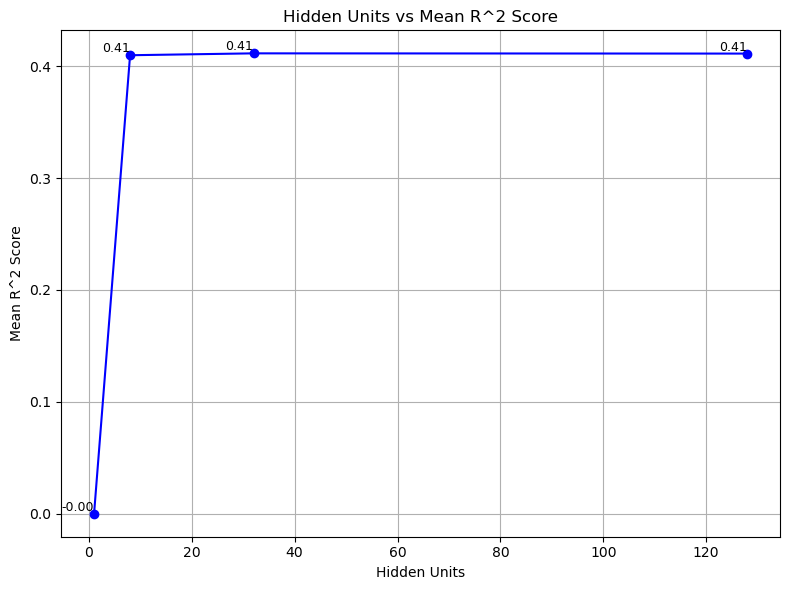

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(results_df_reg_NN['Hidden Units'], results_df_reg_NN['Mean R^2 Score'], marker='o', linestyle='-', color='b')

# labels and title
plt.xlabel('Hidden Units')
plt.ylabel('Mean R^2 Score')
plt.title('Hidden Units vs Mean R^2 Score')
plt.grid(True)

# Annotating each point with R^2 value
for i in range(len(results_df)):
    plt.text(results_df_reg_NN['Hidden Units'][i], results_df_reg_NN['Mean R^2 Score'][i], 
             f'{results_df_reg_NN["Mean R^2 Score"][i]:.2f}', 
             ha='right', va='bottom', fontsize=9, color='black')

plt.tight_layout() 
plt.show()

## [Q13]
- The neural network achieved an R² of 0.40, showing a modest improvement over the linear regression model's R² of 0.37, indicating it captures slightly more variance in the target variable.
- Given the relatively longer training time for the neural network and only a small increase in R², linear regression may be preferred, especially with smaller datasets where simpler models often generalize better.
- The interpretability of linear regression, with clear coefficients showing feature relationships, further supports its use when speed and understanding model behavior are priorities.


## [Q14]
It is clear that as the number of hidden layers increases, the R2 score increases and the MSE decreases. This can be due to the fact neural network's ability to capture complex relationships in data, leading to improved R². However, 128 units results in diminishing returns, with a lower R2 and higher MSE. The performance difference can be attributed to a combination of overfitting, data size, training dynamics, and the complexity of the model relative to the task.

- R² represents the proportion of variance in the dependent variable that is predictable from the independent variables. It's a relative measure that indicates how well the model fits the data.
- MSE provides an absolute measure of how well the model's predictions match the actual data, penalizing larger errors more than smaller ones due to the squaring of errors. **Lower MSE values indicate better model performance; however, MSE does not provide a normalized measure of fit as R² does.**

R² is often used to assess the goodness-of-fit of the model, while MSE is commonly used for quantifying the accuracy of predictions

# Classification 

## 7.1 Logistic Regression

## [Q15-17]

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score

selected_features = k_best_classif_top25['Feature'].tolist() #selected classif features from Q8
X_selected = X_classif[selected_features]

X_train, X_val, y_train, y_val = train_test_split(X_selected, y_classif, test_size=0.2, random_state=4211)

# Lists to store results
eta_list = [1/(10**i) for i in range(1,4)]  # Initial step size
num_repeats = 3

summary = []

for eta in eta_list:
  training_times = []
  accuracies = []
  f1_scores = []
  for _ in range(num_repeats):
    model = SGDClassifier(loss='log_loss', learning_rate='adaptive', eta0=eta)


    # Record training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Store results
    training_times.append(training_time)
    accuracies.append(accuracy)
    f1_scores.append(f1)

  # Calculate mean and standard deviation for training time, accuracy, and F1 score
  mean_training_time = np.mean(training_times)
  std_training_time = np.std(training_times)
  mean_accuracy = np.mean(accuracies)
  std_accuracy = np.std(accuracies)
  mean_f1 = np.mean(f1_scores)
  std_f1 = np.std(f1_scores)

  summary.append({'eta':eta, 'Training Time mean' : mean_training_time,
  'Training Time std' : std_training_time,
  'Accuracy mean': mean_accuracy, 'Accuracy std' : std_accuracy,
  'F1 mean' : mean_f1,
  'F1 std': std_f1})

results_df_classif_LR= pd.DataFrame(summary)

*Reference 4.1*

In [63]:
results_df_classif_LR

,eta,Training Time mean,Training Time std,Accuracy mean,Accuracy std,F1 mean,F1 std
0,0.100,2.814877,0.338164,0.945881,0.000012,0.351365,0.000326
1,0.010,1.733781,0.419931,0.945830,0.000084,0.356230,0.002894
2,0.001,0.956575,0.133332,0.947016,0.000138,0.348685,0.002843


*Reference 4.2*

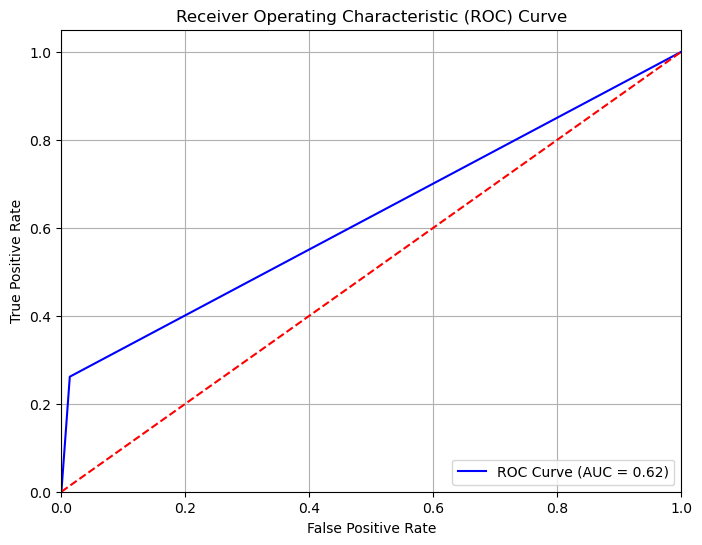

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#y_val and y_pred are taken from the previous cell

fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

*Reference 4.3*

In [65]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

# Output the results
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 561
True Negatives (TN): 36714
False Positives (FP): 504
False Negatives (FN): 1585


Why might the confusion matrix (TP,FP,TN,FN) numbers be helful?

1. Detailed Error Analysis
- Specific Counts: The confusion matrix provides the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). This detailed breakdown allows you to understand where the model is making errors.

- Targeted Insights: By examining these numbers, you can identify specific types of errors. For example, if there are many false negatives, it indicates that the model is missing positive cases, which is critical in healthcare


2. Class imbalances:
In healthcare datasets, class imbalance is common (e.g., fewer positive cases of a disease compared to negative cases).

- Confusion Matrix: It reveals how well the model is identifying the minority class (e.g., positive disease cases). By examining FN and FP, healthcare professionals can understand whether the model is missing critical cases (false negatives) or incorrectly flagging healthy individuals as sick (false positives).

- F1 Score: While the F1 score accounts for both precision and recall, it may mask the impact of false negatives in critical applications like disease detection. A high F1 score could be achieved with a model that still misses many positive cases, which is crucial in healthcare.

##  Feedforward Neural Network

## [Q18 & Q19]

In [66]:
X_selected

,HadAngina,GeneralHealth,HadStroke,Age,ChestScan,RemovedTeeth,DifficultyWalking,HadDiabetes,PhysicalHealthDays,HadCOPD,PneumoVaxEver
0,0,3.0,0,41.9,0,0.0,0,0.0,0.000000,0,0
1,0,1.0,0,42.3,1,2.0,0,0.0,0.000000,0,0
2,0,1.0,0,66.3,0,0.0,1,3.0,0.333333,0,1
3,0,4.0,0,32.3,0,0.0,0,0.0,0.000000,0,0
4,1,1.0,0,71.4,1,3.0,1,0.0,5.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
196812,0,2.0,0,72.8,1,1.0,0,3.0,0.000000,0,1
196813,0,4.0,0,47.2,0,0.0,0,0.0,0.000000,0,0
196814,0,2.0,0,67.3,0,1.0,1,0.0,0.000000,0,0
196815,0,3.0,0,72.5,1,1.0,0,0.0,0.000000,0,1


In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

selected_features = k_best_classif_top25['Feature'].tolist() #selected classif features from Q8
X_selected = X_classif[selected_features]

#Split the data
X_train, X_val, y_train, y_val = train_test_split(X_selected, y_classif, test_size=0.2, random_state=4211)

hidden_units = [1, 8, 32, 128]
accuracies = []
accuracies_std = []
f1_scores = []
f1_scores_std = []
training_times = []
training_times_std = []
models = {}  # Dictionary to store all models

for H in hidden_units:
    print(f'\nRunning experiments for hidden units: {H}')
    accuracies_for_H = []
    f1_scores_for_H = []
    training_times_for_H = []

    # Run the model 3 times for each H
    for run in range(3):
        #Create MLP Classifer with 3 hidden layer
        model = MLPClassifier(hidden_layer_sizes=(H,H,H), early_stopping=True)

        # Record training time
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()

        # Record training time
        training_time = end_time - start_time
        training_times_for_H.append(training_time)

        # Evaluate the model
        y_val_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)

        accuracies_for_H.append(accuracy)
        f1_scores_for_H.append(f1)

    # Average results for the current H
    accuracies.append(np.mean(accuracies_for_H))
    accuracies_std.append(np.std(accuracies_for_H))

    f1_scores.append(np.mean(f1_scores_for_H))
    f1_scores_std.append(np.std(f1_scores_for_H))

    training_times.append(np.mean(training_times_for_H))
    training_times_std.append(np.std(training_times_for_H))

    models[H] = model

print("Model Complete")


Running experiments for hidden units: 1

Running experiments for hidden units: 8

Running experiments for hidden units: 32

Running experiments for hidden units: 128
Model Complete


*Reference 4.4*

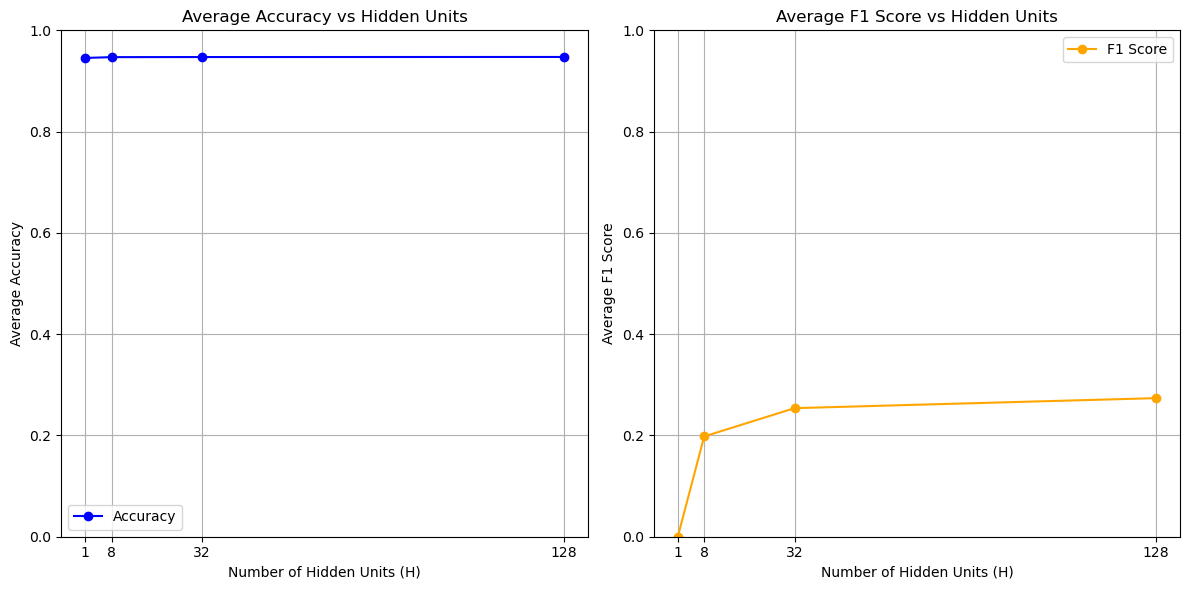

In [74]:
# Plot the results
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(hidden_units, accuracies, marker='o', label='Accuracy', color='blue')
plt.title('Average Accuracy vs Hidden Units')
plt.xlabel('Number of Hidden Units (H)')
plt.ylabel('Average Accuracy')
plt.xticks(hidden_units)
plt.ylim(0.0, max(1.0, max(accuracies) + 0.05))  # Dynamically set y-axis limits for accuracy
plt.grid()
plt.legend()


# Plot F1 Score
plt.subplot(1, 2, 2)
plt.plot(hidden_units, f1_scores, marker='o', label='F1 Score', color='orange')
plt.title('Average F1 Score vs Hidden Units')
plt.xlabel('Number of Hidden Units (H)')
plt.ylabel('Average F1 Score')
plt.xticks(hidden_units)
plt.ylim(0.0, max(1.0, max(f1_scores) + 0.05))  # Dynamically set y-axis limits for F1 score
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

*Reference 4.5*

Given the fact that the graph does not display the relationships well, we will also get a table for the values

In [75]:
results = pd.DataFrame({'Hidden Units' : hidden_units,
                        'Training Times mean': training_times, 'Training Times std': training_times_std,
                        'Accuracy Scores mean': accuracies, 'Accuracy Scores std' :  accuracies_std,
                        'F1 Scores mean' : f1_scores, 'F1 Scores std': f1_scores_std})
results

,Hidden Units,Training Times mean,Training Times std,Accuracy Scores mean,Accuracy Scores std,F1 Scores mean,F1 Scores std
0,1,1.758104,0.026288,0.945483,0.000000,0.000000,0.000000
1,8,3.615834,0.469639,0.947067,0.000168,0.198031,0.051394
2,32,4.734227,1.439698,0.947245,0.000328,0.253901,0.070799
3,128,42.845226,0.459179,0.947414,0.000157,0.273673,0.032016


*Reference 4.6*

We are getting an extremely low F1 score, yet are getting high accuracy.

In [76]:
y_classif.value_counts()

HadHeartAttack
0    186070
1     10747
Name: count, dtype: int64

In [77]:
print(f'Proportion of positive cases: {y_classif[y_classif== 1].shape[0]/(y_classif[y_classif == 0].shape[0]+y_classif[y_classif== 1].shape[0])}')

Proportion of positive cases: 0.05460402302646621


*Reference 4.7*

In [80]:
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()

# Output the results
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 401
True Negatives (TN): 36885
False Positives (FP): 333
False Negatives (FN): 1745


## [Q20]
The logistic regression has a faster training time, with a higher F1 and almost the same accuracy score. The combination of SGD's efficiency, the simpler structure of logistic regression, and the characteristics of the dataset likely contributed to the higher F1 score. Furthermore, the complexity of the neural network likely contributed to the higher learning times.

## [Q21]
The F1 score tends to increase as the hidden layer size grows because more hidden units help the model capture complex patterns in the data. This is especially useful for datasets with intricate relationships. There may be an optimal number of hidden units where performance improves significantly, but adding too many beyond that can lead to diminishing returns.



*Reference 4.8*

## [Q22]

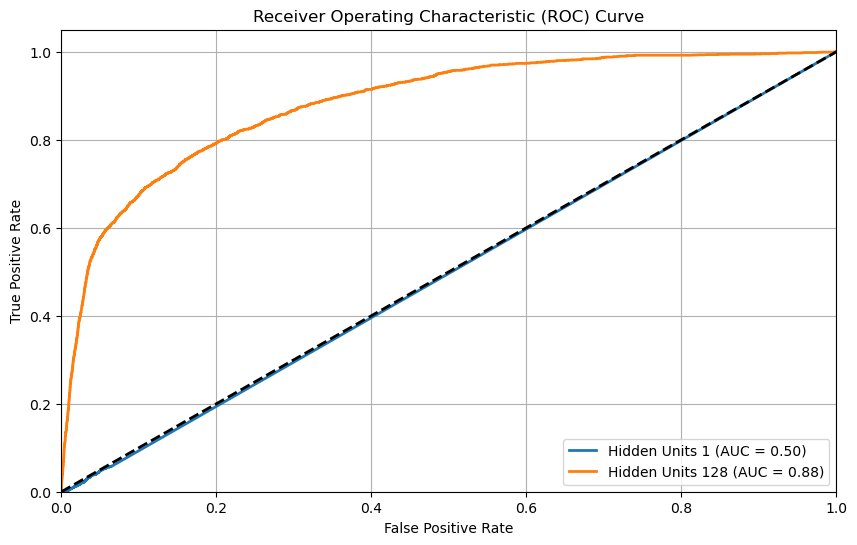

In [79]:
fpr = {}
tpr = {}
roc_auc = {}

for H in [1, 128]:
    y_val_prob = models[H].predict_proba(X_val)[:, 1]  # Get probabilities for the positive class
    fpr[H], tpr[H], _ = roc_curve(y_val, y_val_prob)
    roc_auc[H] = auc(fpr[H], tpr[H])

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
for H in [1, 128]:
    plt.plot(fpr[H], tpr[H], lw=2, label=f'Hidden Units {H} (AUC = {roc_auc[H]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

The ROC curve plots the true positive rate (recall) against the false positive rate at various threshold settings. Because of its nature to model the TPR, the ROC AUC curve for imbalanced datasets helps ensure that you’re not just achieving high accuracy through majority class predictions. Instead, it provides a more nuanced understanding of model performance, focusing on the ability to correctly classify the minority class while managing false positives effectively. This is crucial in many real-world applications where false negatives can have severe consequences, such as in fraud detection or medical diagnoses. 

The shape of the ROC curve provides insight into the model's overall performance. A curve that hugs the top left corner indicates a strong model, while a curve closer to the diagonal line (the line of no discrimination) indicates poor performance.

# Bonus Section

## 8.1

No feature engineering to be done

In [94]:
bonus_df = train_data # original dataframe with no feature engieering

### Combination A

*Reference 5.1*

In [95]:
categorical_features_bonus = list(categorical_features)
categorical_features_bonus.remove('HadHeartAttack')

In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

y_bonus = bonus_df['HadHeartAttack']
X_bonus = bonus_df.drop(columns=['HadHeartAttack'])

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X_bonus, y_bonus, test_size=0.2, random_state=4211)

#Preprocessor
preprocessor_A = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler(with_mean=True))  
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')), 
            ('scaler', StandardScaler(with_mean=False))
        ]), categorical_features_bonus)
    ]
)

model_A = Pipeline(steps=[
    ('preprocessor', preprocessor_A),
    ('classifier', MLPClassifier(hidden_layer_sizes=(128, 128, 128), early_stopping=True))
])

model_A.fit(X_train, y_train)
y_pred_A = model_A.predict(X_test)
print("Combination A Classification Report:")
print(f'Combination A accuracy score: {accuracy_score(y_test, y_pred_A)}')
print(f'Combination A f1 score: {f1_score(y_test, y_pred_A)}')

Combination A Classification Report:
Combination A accuracy score: 0.9480489787623209
Combination A f1 score: 0.3717357910906298


Usually when we do f1_score, without any average criterion, it provides the f1 score for the positive class. Therefore the comparable f1 score here is 0.33.

### Combination B

In [115]:
bonus_features_excluding_ordinal = list(set(categorical_features_bonus) - set(ordial_features))

Setting up the correct Ordinal Order

In [111]:
ordial_order = [['Never used e-cigarettes in my entire life', 'Not at all (right now)', 'Use them a few days', 'Use them every day'], 
                ['Within past year (anytime less than 12 months ago)', '1 year but less than 2 years ago (Within past 2 years)', '2 year but less than 5 years ago (Within past 5 years)', '5 or more years ago'], 
                ['0', '1 to 5', '6 or more, but not all', 'All'],
                ['Poor', 'Fair', 'Good', 'Very good', "Excellent"],
                ['Never smoked', 'Former smoker','Current smoker - now smokes some days' ,'Current smoker - now smokes every day'],
                ['No', 'No, pre-diabetes or borderline diabetes','Yes, but only during pregnancy (female)', 'Yes']
                ]

ordial_order

[['Never used e-cigarettes in my entire life',
  'Not at all (right now)',
  'Use them a few days',
  'Use them every day'],
 ['Within past year (anytime less than 12 months ago)',
  '1 year but less than 2 years ago (Within past 2 years)',
  '2 year but less than 5 years ago (Within past 5 years)',
  '5 or more years ago'],
 ['0', '1 to 5', '6 or more, but not all', 'All'],
 ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
 ['Never smoked',
  'Former smoker',
  'Current smoker - now smokes some days',
  'Current smoker - now smokes every day'],
 ['No',
  'No, pre-diabetes or borderline diabetes',
  'Yes, but only during pregnancy (female)',
  'Yes']]

*Reference 5.2*

In [125]:
preprocessor_B = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler(with_mean=True))
        ]), numerical_features),
        ('ord', OrdinalEncoder(categories=ordial_order), ordial_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), bonus_features_excluding_ordinal)  
    ]
)

model_B = Pipeline(steps=[
    ('preprocessor', preprocessor_B),
    ('classifier', MLPClassifier(hidden_layer_sizes=(128, 128, 128), early_stopping=True))
])

model_B.fit(X_train, y_train)
y_pred_B = model_B.predict(X_test)
print("Combination B Classification Report:")
print(f'Combination B accuracy score: {accuracy_score(y_test, y_pred_B)}')
print(f'Combination B f1 score: {f1_score(y_test, y_pred_B)}')

Combination B Classification Report:
Combination B accuracy score: 0.9484300375978051
Combination B f1 score: 0.2836979534227241


The f1 score improves by 0.02, suggesting some improvements. This can be due to the definition of the ordered categorical features

### Combination C

*Reference 5.3*

In [126]:
preprocessor_C = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), numerical_features),
        ('ord', OrdinalEncoder(categories=ordial_order), ordial_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), bonus_features_excluding_ordinal)  
    ]
)

model_C = Pipeline(steps=[
    ('preprocessor', preprocessor_C),
    ('classifier', MLPClassifier(hidden_layer_sizes=(128, 128, 128), early_stopping=True))
])

model_C.fit(X_train, y_train)
y_pred_C = model_C.predict(X_test)
print("Combination B Classification Report:")
print(f'Combination C accuracy score: {accuracy_score(y_test, y_pred_C)}')
print(f'Combination C f1 score: {f1_score(y_test, y_pred_C)}')

Combination B Classification Report:
Combination C accuracy score: 0.9489381160451174
Combination C f1 score: 0.31864406779661014


## 8.2

### [Q25]

*Reference 5.4*

In [134]:
from sklearn.model_selection import GridSearchCV

# Select the features from Q8
selected_features = k_best_classif_top25['Feature'].tolist()
X_selected = X_bonus[selected_features]

# Define numerical and categorical features based on your dataset
numerical_features_bonus = [feature for feature in selected_features if feature in X_bonus.select_dtypes(include=[np.number]).columns]
categorical_features_bonus = [feature for feature in selected_features if feature not in numerical_features]

# Preprocessor setup
preprocessor_A = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler(with_mean=True))
        ]), numerical_features_bonus),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('scaler', StandardScaler(with_mean=False))
        ]), categorical_features_bonus) 
    ]
)

# Hyperparameter grid
param_grid = {
    'classifier__activation': ['relu', 'tanh'],
    'classifier__solver': ['adam', 'sgd'],
    'classifier__alpha': [0.1, 0.01, 0.001],
    'classifier__learning_rate': ['constant', 'adaptive'],
}

# Initialize MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32), random_state=4211, early_stopping=True)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_A),
    ('classifier', mlp)
])

# Perform a single train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_bonus, test_size=0.2, random_state=4211)

# Run GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract cross-validation results
cv_results = grid_search.cv_results_

# Create a DataFrame for easy analysis
results_df = pd.DataFrame({
    'Parameters': cv_results['params'],
    'Mean Accuracy': cv_results['mean_test_score'],
    'Std Accuracy': cv_results['std_test_score']
})

# Highlight the best hyperparameter setting based on mean accuracy
best_hyperparameters = results_df.loc[results_df['Mean Accuracy'].idxmax()]

# Report results
print("\nSummary of Hyperparameter Settings:")
print(results_df)
print("\nBest Hyperparameter Setting:", best_hyperparameters['Parameters'])
print("Best Mean Validation Accuracy:", best_hyperparameters['Mean Accuracy'])
print("Standard Deviation of Validation Accuracy:", best_hyperparameters['Std Accuracy'])


Summary of Hyperparameter Settings:
                                           Parameters  Mean Accuracy  \
0   {'classifier__activation': 'relu', 'classifier...       0.947559   
1   {'classifier__activation': 'relu', 'classifier...       0.947140   
2   {'classifier__activation': 'relu', 'classifier...       0.947559   
3   {'classifier__activation': 'relu', 'classifier...       0.947311   
4   {'classifier__activation': 'relu', 'classifier...       0.947489   
5   {'classifier__activation': 'relu', 'classifier...       0.947076   
6   {'classifier__activation': 'relu', 'classifier...       0.947489   
7   {'classifier__activation': 'relu', 'classifier...       0.947210   
8   {'classifier__activation': 'relu', 'classifier...       0.947273   
9   {'classifier__activation': 'relu', 'classifier...       0.947025   
10  {'classifier__activation': 'relu', 'classifier...       0.947273   
11  {'classifier__activation': 'relu', 'classifier...       0.947267   
12  {'classifier__activatio

Finally, we will now test the model using the best hyperparamter settings

*Reference 5.5*

In [140]:
#Set up the selected features from Q8 for both the train and test data
selected_features = k_best_classif_top25['Feature'].tolist()
X_selected = X_bonus[selected_features]

y_test = test_data['HadHeartAttack']
X_test = test_data.drop(columns=['HadHeartAttack'])
X_test = X_test[selected_features]

# Define numerical and categorical features based on your dataset
numerical_features_bonus = [feature for feature in selected_features if feature in X_bonus.select_dtypes(include=[np.number]).columns]
categorical_features_bonus = [feature for feature in selected_features if feature not in numerical_features]

preprocessor_A = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler(with_mean=True))
        ]), numerical_features_bonus),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('scaler', StandardScaler(with_mean=False))
        ]), categorical_features_bonus) 
    ]
)

# Define the model with the best param's from above
model_final = Pipeline(steps=[
    ('preprocessor', preprocessor_A),
    ('classifier', MLPClassifier(hidden_layer_sizes=(128, 128, 128), 
                                 alpha=0.1, 
                                 activation='relu', 
                                 learning_rate='constant', 
                                 solver='adam',  # Added comma here
                                 early_stopping=True))
])

model_final.fit(X_selected, y_bonus)
y_pred_final = model_final.predict(X_test)
print("Combination Classification Report (Final):")
print(f'Combination final accuracy score: {accuracy_score(y_test, y_pred_final)}')
print(f'Combination final f1 score: {f1_score(y_test, y_pred_final)}')

Combination Classification Report (Final):
Combination final accuracy score: 0.9485824611319987
Combination final f1 score: 0.23193685488767457
